# Analyzing the College.csv dataset

This notebook follows Exercise 8 in Chapter 2 from "Introduction to Statistical Learning". Open the dataset:

In [295]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import matplotlib as mpl
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [296]:
college=pd.read_csv('https://raw.githubusercontent.com/AtanasiuDemian/Introduction-to-Statistical-Learning---Python/master/Data/College.csv')
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


File "College.csv" contains information about 777 US colleges. Note the first column contains college names and does not have a specific title.

In [297]:
college.rename(columns={'Unnamed: 0':'College'}, inplace=True)
college.head()

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Look at the summary of this data:

In [298]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


The variable "Private" is qualitative and records whether a given college is private or not. Explore the distribution of "Outstate" (out-of-state tuition) for private colleges versus state colleges.

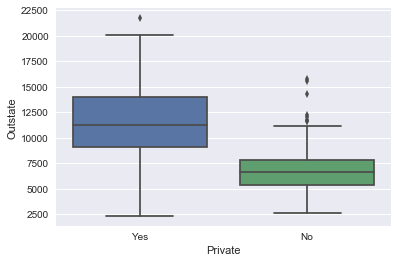

In [299]:
sns.boxplot(x='Private', y='Outstate', data=college)

Private colleges have a wider spread of out-of-state tuition, whereas public ones have a narrower distribution and their tuitions, on average, are considerably lower than their private counterparts: several outlier values of public out-of-state tuition are close only to the median of tuitions for private colleges.

Create a qualitative variable $\textbf{Elite}$ which records whether more than a half of the students at a college were in top 10% of their high school class. The percentage of students coming from top 10% is stored in variable $\textbf{Top10perc}$.

In [300]:
college['Elite']=['Yes' if college.iloc[i].Top10perc>50 else 'No' for i in college.index]

Compare the out-state-tuition for elite colleges versus the rest:

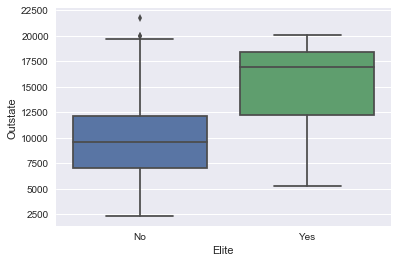

In [301]:
sns.boxplot(x='Elite', y='Outstate', data=college)

It's interesting to observe that for quite a few Elite colleges less 2 thirds of students graduate:

In [302]:
college[(college.Elite=='Yes')&(college['Grad.Rate']<=66)]

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,Yes
212,Fresno Pacific College,Yes,346,274,146,51,87,704,63,9900,3670,630,1818,59,59,10.5,14,8095,54,Yes
253,Hendrix College,Yes,823,721,274,52,87,954,6,8800,3195,500,1200,82,99,13.1,26,8588,63,Yes
409,Niagara University,Yes,2220,1796,467,65,99,1919,334,10320,4762,450,650,68,100,14.2,20,7788,65,Yes
446,Pepperdine University,Yes,3821,2037,680,86,96,2488,625,18200,6770,500,700,95,98,11.6,13,16185,66,Yes
456,Polytechnic University,Yes,1132,847,302,58,89,1379,214,16200,4200,436,2486,90,90,10.4,14,14329,62,Yes
606,University of California at Irvine,No,15698,10775,2478,85,100,12677,864,12024,5302,790,1818,96,96,16.1,11,15934,66,Yes
619,University of Florida,No,12445,8836,3623,54,85,24470,3286,7090,4180,630,1530,88,97,13.4,20,14737,66,Yes
639,University of Minnesota at Morris,No,1458,874,588,56,86,1846,154,9843,3180,600,1500,74,78,14.6,16,6716,51,Yes
666,University of Puget Sound,Yes,4044,2826,688,51,83,2738,138,16230,4500,630,1800,79,86,15.0,17,11217,63,Yes


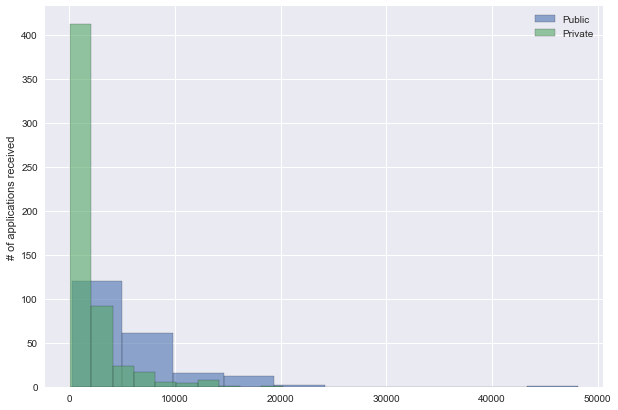

In [303]:
# Do public colleges receive more applications?
college['Private']=(college.Private=='Yes')*1
labels_to_use=['Public', 'Private']
plt.figure(figsize=(10,7))
for i, group in college.groupby('Private'):
    plt.hist(group['Apps'], label=labels_to_use[i], alpha=0.6, ec='black')
plt.ylabel('# of applications received')
plt.legend(loc='best')

Text(0,0.5,'Applications Received')

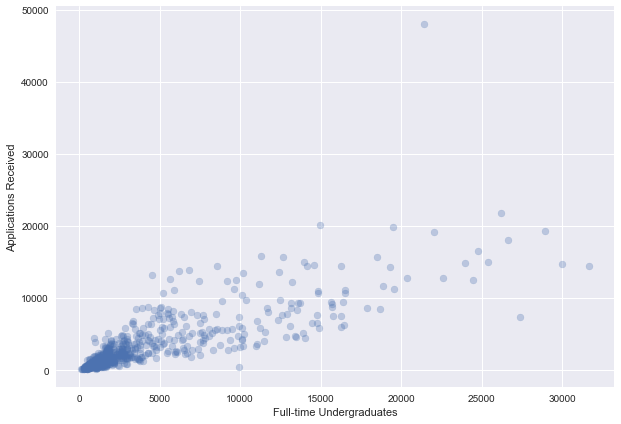

In [304]:
# Do colleges with more FT undergraduates receive more applications?
plt.figure(figsize=(10,7))
plt.scatter(college['F.Undergrad'], college['Apps'], alpha=0.3)
plt.xlabel('Full-time Undergraduates')
plt.ylabel('Applications Received')

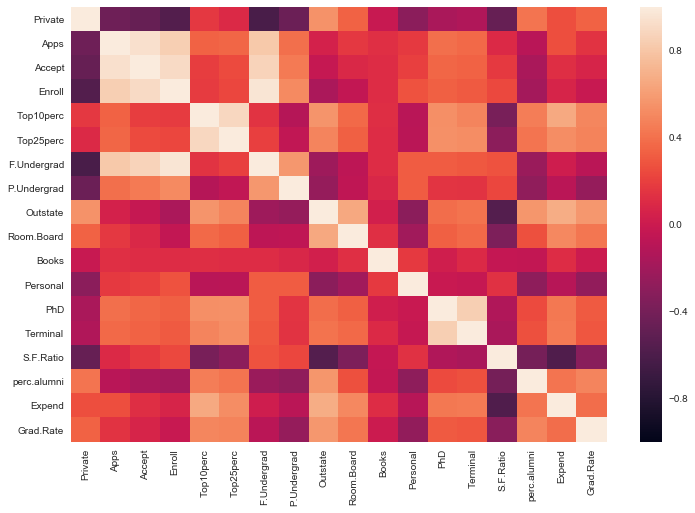

In [305]:
plt.figure(figsize=(12,8))
sns.heatmap(college.corr(), vmin=-1, vmax=1)

**Chapter 6, Exercise 9**

In [306]:
# Split the data set into a training set and test set
college.drop('Elite', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(college.drop(['College', 'Apps'], axis=1), college['Apps'], 
                                                    test_size=0.3)

# Fit an OLS model on the training set
linear = LinearRegression()
linear.fit(X_train, y_train)
print('MSE on test set: {}'.format(mean_squared_error(y_test, linear.predict(X_test))))

MSE on test set: 890308.1197910281


In [307]:
# Fit a Ridge Regression model
# Choose suitable tuning parameter using cross-validation.
lambdas=[0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100,500,1000]
RCV=RidgeCV(alphas=lambdas)
RCV.fit(X_train, y_train)
print('Best lambda: {} \nRidge MSE on test set: {}'.format(RCV.alpha_, mean_squared_error(y_test, RCV.predict(X_test))))

Best lambda: 50.0 
Ridge MSE on test set: 904293.2595545637


Ridge model test set MSE is slightly higher than the one for OLS model.

In [308]:
# Fit a Lasso Regression model
# Choose suitable tuning parameter using cross-validation
LCV=LassoCV(alphas=lambdas)
LCV.fit(X_train, y_train)
print('Best lambda: {} \nLasso MSE on test set: {}'.format(LCV.alpha_, mean_squared_error(y_test, LCV.predict(X_test))))

Best lambda: 500.0 
Lasso MSE on test set: 924852.3651967426


In [309]:
LCV.coef_

array([ -0.        ,   1.58869302,  -0.84009805,  28.30917286,
        -0.        ,   0.06255813,   0.03384529,  -0.14008083,
         0.0887016 ,  -0.1699501 ,   0.03983948,  -4.04736693,
        -2.95819553,   0.        ,   0.        ,   0.13642673,   6.80401697])